# Rotation of Butadiene

Rotation in a conjugated system is more like a chemical reaction that rotation in an alkane. The $\pi$-system will be broken and reform as we cross the highest enetgy point. Stabilization due to conjugation is a big energy difference and we expect it to dominate in the potential energy scan. 

## Start with the Build

Let us build butadiene. I will demonstrate enforcing symmetry here by using variables in the Z-matrix to establish bonds that must remain paired in length. The symmetry will be $C_2$ throughout the bond rotation. It will be $C_{2h}$ in the flat planar form but declaring that will result in errors when the symmetry drops to $C_2$ in the rotated structures.)

In [35]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c2
       dihedral  =  180
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 120
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 180
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
#energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

dihedral_angle = mol.get_variable("dihedral")

print(f"After optimization: {dihedral_angle:.3f} degrees\n") 

hp.drawXYZ(mol)

# psi4.set_output_file("temp.dat", append=False, print_header=False)
# mol.print_in_input_format()
# !cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Initial energy is -153.0208534 Hartrees
After optimization: -180.000 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## The PES Scan

Let us perform a quick PES scan using a very limited basius set, STO-3G. I will repurpose the code from the PES scan for butane. Examine the cose below and spot the changes.

In [36]:
mol2 = mol.clone()

# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()
psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

output_file = "Butadiene_PES_1.out"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

step = 10; start = 0; end = 180
number_of_points = (end - start)//step + 1
range_of_values = np.linspace(start, end, number_of_points) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


dihedral_list = []
energy_list = []
geometries = []
for angle in range_of_values:
    mol2.set_variable("dihedral", angle)
    energy = psi4.optimize("hf/sto-3g", molecule = mol2)
    dihedral_list.append(angle)
    energy_list.append(energy)
    geometries.append(mol2.clone())

print("Done")


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


    angle      energy    kJ/mole
0     0.0 -153.017931   7.671470
1    10.0 -153.017919   7.702744
2    20.0 -153.017831   7.933841
3    30.0 -153.017543   8.690356
4    40.0 -153.016939  10.275816
5    50.0 -153.016000  12.742100
6    60.0 -153.014834  15.802311
7    70.0 -153.013638  18.943394
8    80.0 -153.012629  21.592540
9    90.0 -153.012015  23.204205
10  100.0 -153.011974  23.313073
11  110.0 -153.012600  21.668228
12  120.0 -153.013832  18.433425
13  130.0 -153.015441  14.208740
14  140.0 -153.017115   9.814123
15  150.0 -153.018662   5.754040
16  160.0 -153.019851   2.632729
17  170.0 -153.020599   0.668695
18  180.0 -153.020853   0.000000


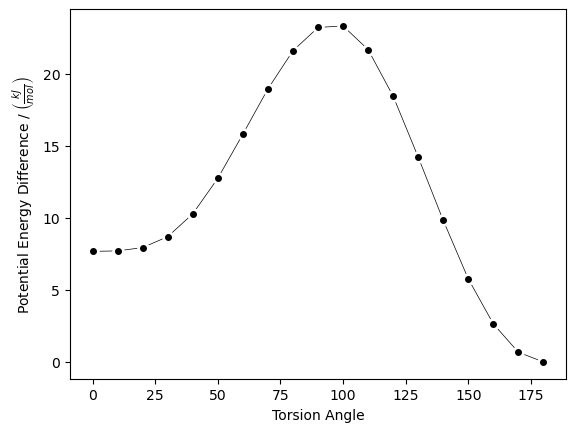

In [39]:
data_dictionary = {"angle": dihedral_list,
                   "energy": energy_list}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol
print(df)

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

x = df["angle"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "black", s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)
# ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", s = 64, zorder = 1)
# ax.text(66.51-10, 20.5,"$66.5^\circ$")

ax.set_xlabel('Torsion Angle')
ax.set_ylabel(r'Potential Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()


In [43]:
mol3 = mol.clone()

# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()
psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

output_file = "Butadiene_PES_2.out"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

step = 10; start = 0; end = 180
number_of_points = (end - start)//step + 1
range_of_values = np.linspace(start, end, number_of_points) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


dihedral_list = []
energy_list = []
geometries = []
for angle in range_of_values:
    mol3.set_variable("dihedral", angle)
    energy = psi4.optimize("hf/6-31+G(d)", molecule = mol3)
    dihedral_list.append(angle)
    energy_list.append(energy)
    geometries.append(mol3.clone())

print("Done")


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


    angle      energy    kJ/mole
0     0.0 -154.919760  16.633514
1    10.0 -154.919964  16.097536
2    20.0 -154.920450  14.822747
3    30.0 -154.920932  13.556470
4    40.0 -154.921131  13.034678
5    50.0 -154.920884  13.681925
6    60.0 -154.920187  15.511899
7    70.0 -154.919169  18.185956
8    80.0 -154.918048  21.130001
9    90.0 -154.917097  23.625995
10  100.0 -154.916619  24.880214
11  110.0 -154.916887  24.176295
12  120.0 -154.917999  21.258412
13  130.0 -154.919741  16.684928
14  140.0 -154.921706  11.525222
15  150.0 -154.923519   6.764117
16  160.0 -154.924930   3.060195
17  170.0 -154.925804   0.766092
18  180.0 -154.926096   0.000000


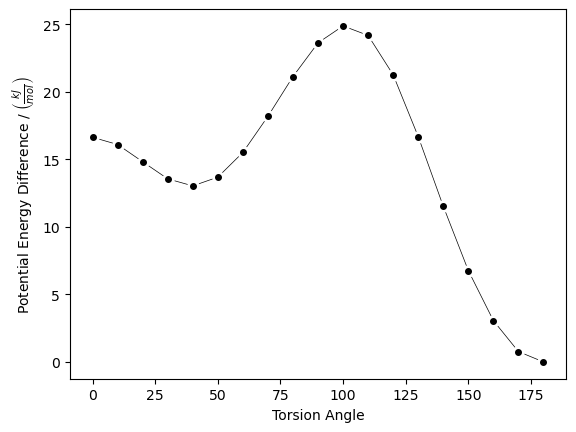

In [49]:
data_dictionary = {"angle": dihedral_list,
                   "energy": energy_list}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol
print(df)

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

x = df["angle"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "black", s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)
# ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", s = 64, zorder = 1)
# ax.text(66.51-10, 20.5,"$66.5^\circ$")

#ax.set_xlim([start-10, end+10])

ax.set_xlabel('Torsion Angle')
ax.set_ylabel(r'Potential Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()
